In [1]:
import numpy as np 
import pandas as pd 
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

Using TensorFlow backend.


In [13]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

DIR = './gender/e'

def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for img in os.listdir(DIR):
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            data = np.array(Image.open(path))
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))

get_size_statistics()

Average Height: 144.8036638789327
Max Height: 657
Min Height: 18


Average Width: 91.27817602548785
Max Width: 472
Min Width: 16


In [2]:
os.listdir(path='.')
listOfFile = os.listdir("./gender")
x=len(listOfFile)
for i in range(0,x):
    print(listOfFile[i])

e
k


In [3]:
onlyfiles=[]
x=len(listOfFile)
for i in range(0,x):
    folder="./gender/"+listOfFile[i]
    print(folder)
    onlyfiles2 = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    for t in range(0, len(onlyfiles2)):
        onlyfiles.append(folder+"/"+onlyfiles2[t])
print("Working with {0} images".format(len(onlyfiles)))
print(onlyfiles[5])

./gender/e
./gender/k
Working with 10079 images
./gender/e/001 (103).jpg


In [14]:
from PIL import Image
for t in range(0, len(onlyfiles)):
    img = Image.open(onlyfiles[t])
    img = img.resize((256,256))   # image resizing

In [128]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import re

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    r1 = re.findall("\/.\/", _file)
    mystring = str(r1)
    r2 = re.findall("k|e", mystring)
    y_train.append(r2)
    i=i+1
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 256
image_height = 256
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(_file)
    img = img.resize((256,256))
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((3, 64, 64))
    # Normalize
    #x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 3000 == 0:
        print("%d images to array" % i)
print("All images to array!")

Files in train_files: 10079
3000 images to array
6000 images to array
9000 images to array
All images to array!


In [4]:
#y_train=np.array(y_train)
#np.save('y_train.npy', y_train)
#np.save('dataset.npy', dataset)
dataset=np.load('dataset.npy')
y_train=np.load('y_train.npy')

In [5]:
#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)

x train:  (8063, 3, 64, 64)
x test:  (2016, 3, 64, 64)


In [6]:
# Normalize the data

X_train = X_train / 255.0
X_test = X_test / 255.0

#cnn için gerekli one hot encoding

from sklearn.preprocessing import LabelEncoder
import numpy as np

y_train = np.array(y_train)
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(y_train)
y_train = to_categorical(vec)

y_test = np.array(y_test)
label_encoder = LabelEncoder()
vec1 = label_encoder.fit_transform(y_test)
y_test = to_categorical(vec1)

#y_train = y_train / 255.0

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (8063, 3, 64, 64)
X_test shape:  (2016, 3, 64, 64)


C:\Users\mert5\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mert5\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
#reshape data to fit model
x_train = X_train.reshape(8063,64,64,3)
x_test = X_test.reshape(2016,64,64,3)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)

x train:  (8063, 64, 64, 3)
x test:  (2016, 64, 64, 3)


In [8]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (8063, 64, 64, 3)
x test:  (2016, 64, 64, 3)
y train:  (8063, 2)
y test:  (2016, 2)


In [9]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(80, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))  #10 y'deki class sayısı

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [11]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [12]:
epochs = 70
batch_size = 125

In [13]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0.5,  
        zoom_range = 0.5,
        width_shift_range=0.5, 
        height_shift_range=0.5,  
        horizontal_flip=False,
        vertical_flip=False)  

datagen.fit(x_train)

In [14]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), steps_per_epoch=x_train.shape[0] // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/70
64/64 [==============================] - 18s 278ms/step - loss: 0.6858 - acc: 0.5646 - val_loss: 0.6662 - val_acc: 0.5784
Epoch 2/70
64/64 [==============================] - 13s 204ms/step - loss: 0.6624 - acc: 0.6118 - val_loss: 0.6281 - val_acc: 0.6463
Epoch 3/70
64/64 [==============================] - 13s 201ms/step - loss: 0.6542 - acc: 0.6263 - val_loss: 0.6377 - val_acc: 0.6414
Epoch 4/70
64/64 [==============================] - 13s 202ms/step - loss: 0.6488 - acc: 0.6262 - val_loss: 0.6160 - val_acc: 0.6602
Epoch 5/70
64/64 [==============================] - 13s 202ms/step - loss: 0.6485 - acc: 0.6289 - val_loss: 0.6243 - val_acc: 0.6468
Epoch 6/70
64/64 [==============================] - 13s 202ms/step - loss: 0.6440 - acc: 0.6360 - val_loss: 0.6158 - val_acc: 0.6677
Epoch 7/70
64/64 [==============================] - 13s 204ms/step - loss: 0.6402 - acc: 0.6434 - val_loss: 0.6276 - val_acc: 0.6275
Epoch 8/70
64/64 [===

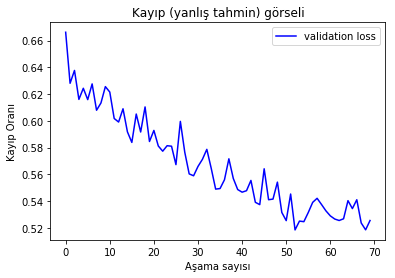

In [17]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Kayıp (yanlış tahmin) görseli")
plt.xlabel("Aşama sayısı")
plt.ylabel("Kayıp Oranı")
plt.legend()
plt.show()

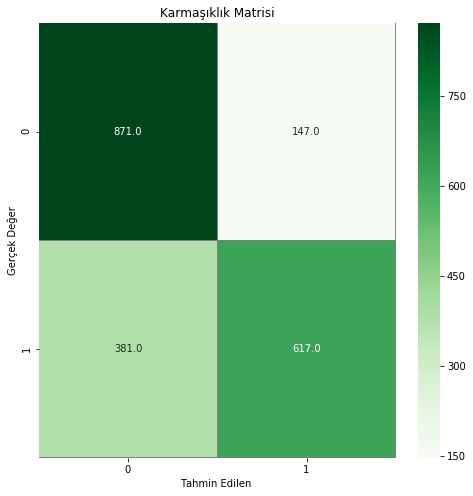

In [18]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Tahmin Edilen ")
plt.ylabel("Gerçek Değer")
plt.title("Karmaşıklık Matrisi")
plt.show()

# Lineer regresyoN

In [101]:
dataset=np.load('dataset.npy')
y_train=np.load('y_train.npy')

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting 
X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

In [132]:
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print(number_of_train,number_of_test)

8063 2016


In [149]:
x=len(y_train)
y2_train=[]
for i in range(0,x):
    if y_train[i]=="k":
        y2_train.append(1)
    elif y_train[i]=='e':
        y2_train.append(0)
          
        

In [121]:
x=len(y_test)
for i in range(0,x):
    if y_test[i]=='k':
        y_test[i]=1
    else:
        y_test[i]=0

In [152]:
print(y2_train)

[]


In [123]:
#reshape data to fit model

from keras.utils import to_categorical

x_train = X_train.reshape(8063 ,64,64,3)
x_test = X_test.reshape(2016,64,64,3)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)


#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

y_train = pd.Categorical(y_train).codes
y_test = pd.Categorical(y_test).codes
"""
from sklearn.preprocessing import LabelEncoder
import numpy as np

y_train = np.array(y_train)
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(y_train)
y_train = to_categorical(vec)

y_test = np.array(y_test)
label_encoder = LabelEncoder()
vec1 = label_encoder.fit_transform(y_test)
y_test = to_categorical(vec1)
"""

x train:  (8063, 64, 64, 3)
x test:  (2016, 64, 64, 3)


'\nfrom sklearn.preprocessing import LabelEncoder\nimport numpy as np\n\ny_train = np.array(y_train)\nlabel_encoder = LabelEncoder()\nvec = label_encoder.fit_transform(y_train)\ny_train = to_categorical(vec)\n\ny_test = np.array(y_test)\nlabel_encoder = LabelEncoder()\nvec1 = label_encoder.fit_transform(y_test)\ny_test = to_categorical(vec1)\n'

In [124]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (8063, 12288)
X test flatten (2016, 12288)


In [125]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (12288, 8063)
x test:  (12288, 2016)
y train:  (8063,)
y test:  (2016,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid={"C":(1,2),"penalty":["l1","l2"]},    #np.logspace
logistic_regression=LogisticRegression(random_state=21)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=2)
log_reg_cv.fit(x_train.T,y_train.T)
#logistic_regression.fit(x_train.T,y_train.T)